# COMP-486 Assignment 2: Work with Data
## Xavier Silva

### Question 1
Download the data.

In [ ]:
from pathlib import Path
import pandas as pd
import urllib.request

# download the data if it is not downloaded
if not Path("adm_data.csv").is_file():
  # here I download the data from my personal git repo for this class instead of using Google Drive
  url = "https://raw.githubusercontent.com/RochX/comp486-assignments/main/assignment2/adm_data.csv"
  urllib.request.urlretrieve(url, "adm_data.csv")

In [ ]:
data=pd.read_csv('adm_data.csv')

### Question 2
Show the first 5 rows in the data.

In [ ]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


### Question 3
Get a brief description of the data.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


### Question 4
How many Universities have a rate of 4?

In [ ]:
data["University Rating"].value_counts()

3    133
2    107
4     74
5     60
1     26
Name: University Rating, dtype: int64

There are 74 universities with a rating of 4.

### Question 5
Use the describe function to answer the following questions:
- What is the maximum value of the “GRE Score” attribute?
- What is the minimum value of the “CGPA” attribute?
-  Does this data have any missing data?

In [ ]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


The maximum value of the GRE Score attribute is `340.0`.
The minimum value of the CGPA attribute is `6.8`.
From running `data.info()` (see question 3) we can see that each attribute has exactly 400 non-null values, so there is no missing data since we have 400 instances.

### Question 6
Plot a histogram for each numerical attribute and write your observations.

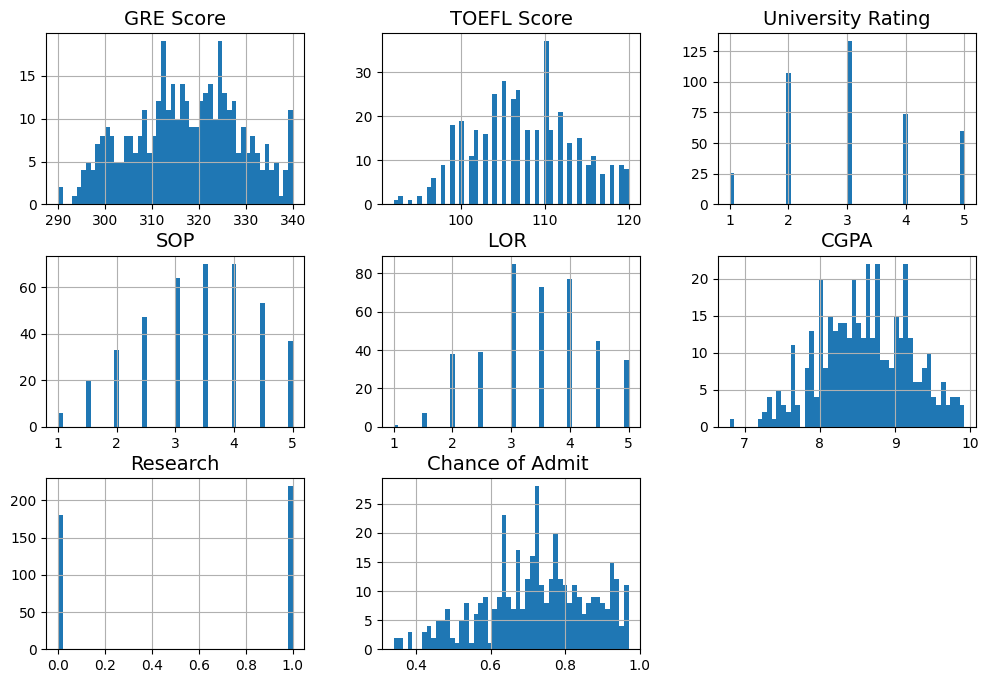

In [ ]:
import matplotlib.pyplot as plt

# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# exclude the serial number from the histogram plots
data_to_plot = data.drop('Serial No.', axis=1)
data_to_plot.hist(bins=50, figsize=(12, 8))
plt.show()

From these histogram plots and running `data.head()` previously, we can determine which attributes are continuous numerical values, discrete numerical values, or binary values.

The attributes `CGPA`, and `Chance of Admit` all appear to be a continuous numerical values.

The attributes `GRE Score`, `TOEFL Score`, `University Rating`, `SOP`, `LOR` all are discrete numerical values.
The values of these attributes are a set range of integers.

The attribute `Research` is a binary value, every instance either has a `Research` value of `0` or `1`.
The `Research` attribute is acting as true and false value, telling us whether the university offers research.


### Question 7
Split the dataset into a training set (%85) and a test set (%15). How many
instances are in each of them?

In [ ]:
import numpy as np

def shuffle_and_split_data(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [ ]:
# set seed to get same training and test sets
np.random.seed(42)

train_set, test_set = shuffle_and_split_data(data, 0.15)
len(train_set), len(test_set)

(340, 60)

There are 340 instances within the training set and 60 instances within the test set when splitting the data in a 85% : 15% ratio.

### Question 8
Show the correlation between “Chance of Admit ” and the other attributes.
Write down your observations.

In [ ]:
corr_matrix = data.corr()

corr_matrix["Chance of Admit "].sort_values(ascending=False)

Chance of Admit      1.000000
CGPA                 0.873289
GRE Score            0.802610
TOEFL Score          0.791594
University Rating    0.711250
SOP                  0.675732
LOR                  0.669889
Research             0.553202
Serial No.           0.042336
Name: Chance of Admit , dtype: float64

The attributes `CGPA` and `GRE Score` seem to be most positively correlated to `Chance of Admit`.

### Question 9
Plot the correlation between “Chance of Admit ” and the 4 first promising
attributes that seem most correlated with the Chance of Admit (use Pandas
scatter_matrix() function).

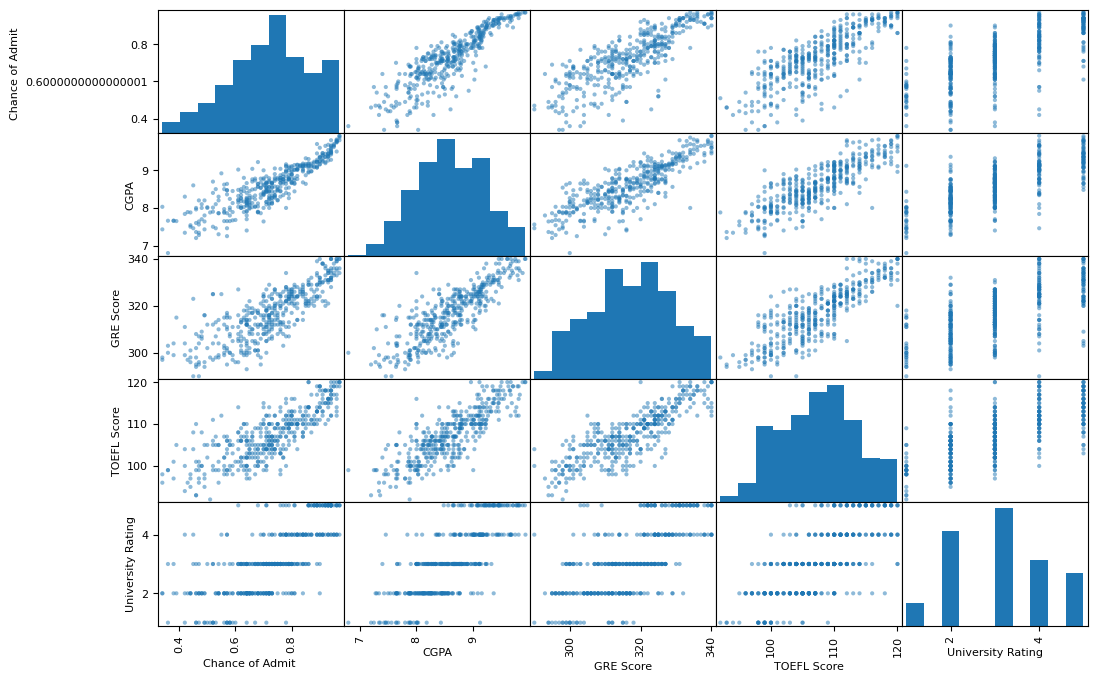

In [ ]:
from pandas.plotting import scatter_matrix

# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=12)
plt.rc('axes', labelsize=8, titlesize=8)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

attributes = ["Chance of Admit ", "CGPA", "GRE Score",
              "TOEFL Score", "University Rating"]
scatter_matrix(data[attributes], figsize=(12, 8))
plt.show()

### Question 10
Choose one of Feature Scaling techniques and apply it to the attributes in
the data set.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = data

# get all columns except the serial number; we don't want to apply our scale to the serial number
data_columns = list(data)[1:]
data_scaled[data_columns] = min_max_scaler.fit_transform(data[data_columns])


data_scaled = pd.DataFrame(data_scaled, columns=list(data))

data_scaled

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,0.94,0.928571,0.75,0.875,0.875,0.913462,1.0,0.920635
1,2,0.68,0.535714,0.75,0.750,0.875,0.663462,1.0,0.666667
2,3,0.52,0.428571,0.50,0.500,0.625,0.384615,1.0,0.603175
3,4,0.64,0.642857,0.50,0.625,0.375,0.599359,1.0,0.730159
4,5,0.48,0.392857,0.25,0.250,0.500,0.451923,0.0,0.492063
...,...,...,...,...,...,...,...,...,...
395,396,0.68,0.642857,0.50,0.625,0.625,0.717949,1.0,0.761905
396,397,0.70,0.535714,0.50,0.500,0.625,0.740385,1.0,0.793651
397,398,0.80,0.857143,0.75,1.000,0.875,0.849359,1.0,0.904762
398,399,0.44,0.392857,0.50,0.625,0.750,0.634615,0.0,0.523810


In [ ]:
data_scaled.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,0.536150,0.550357,0.521875,0.600000,0.613125,0.576579,0.547500,0.610079
std,115.614301,0.229473,0.216768,0.285932,0.251717,0.224619,0.191127,0.498362,0.226364
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,100.750000,0.360000,0.392857,0.250000,0.375000,0.500000,0.439103,0.000000,0.476190
50%,200.500000,0.540000,0.535714,0.500000,0.625000,0.625000,0.580128,1.000000,0.619048
75%,300.250000,0.700000,0.714286,0.750000,0.750000,0.750000,0.725160,1.000000,0.777778
max,400.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


From running `data_scaled.describe()` we can see that the minimumn and maximum for each attribute is 0 and 1 respectively, so the minimax scaling worked.